<a href="https://colab.research.google.com/github/LuisFFSantos/Data_Science/blob/main/%5BTemplate%5D_Analisando_os_Dados_do_Airbnb_Barcelona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Barcelona*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Barcelona, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/spain/catalonia/barcelona/2021-07-07/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id`- número de id gerado para identificar o imóvel
* `name`- nome da propriedade anunciada 
* `host_id`- número de id do proprietário (anfitrião) da propriedade
* `host_name` - nome do anfitrião
* `neighbourhood_group`- descreve onde uma determinada listagem está localizada
* `neighbourhood` - nome do bairro
* `latitude`- coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price`- preço para alugar o imóvel
* `minimum_nights`- quantidade mínima de noites para reservar
* `number_of_reviews`- número de reviews que a propriedade possui
* `last_review`- data do último review
* `reviews_per_mouth`- quantidade de reviews por mês
* `calculated_host_listings_count`- quantidade de imóveis do mesmo anfitrião
* `availability_365`- número de dias de disponibilidade dentro de 365 dias


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40556,2.17262,Entire home/apt,169,1,21,2019-10-11,0.23,18,60
1,23197,Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41291,2.22063,Entire home/apt,240,3,52,2019-12-15,0.78,2,169
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40566,2.17015,Entire home/apt,144,2,63,2019-09-06,0.62,3,8
3,34241,Private Double room - Plaza Real,73163,Andres,Ciutat Vella,el Barri Gòtic,41.38062,2.17517,Private room,50,30,8,2012-12-30,0.06,2,35
4,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37978,2.17623,Entire home/apt,283,4,150,2020-03-11,1.54,2,148


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

O conjunto de dados possui 16 variáveis e 17079 entradas. Sendo que as variáveis são do tipo *int*, *object* e *float*.

In [5]:
# identificar o volume de dados do DataFrame
print("Entradas:\t{}".format(df.shape[0]))
print("Variáveis:\t{}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	17079
Variáveis:	16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.298320
last_review                       0.298320
host_name                         0.002869
name                              0.000586
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

* As variáveis `reviews_per_month` e `last_review` têm aproximadamente 30% dos valores nulos.
* Enquanto as vaiáveis `host_name`e `name` possuem aproximadamente 0,3% e 0,05% dos valores nulos, respectivamente.

### **Q3. Qual o tipo de distribuição das variáveis?** 

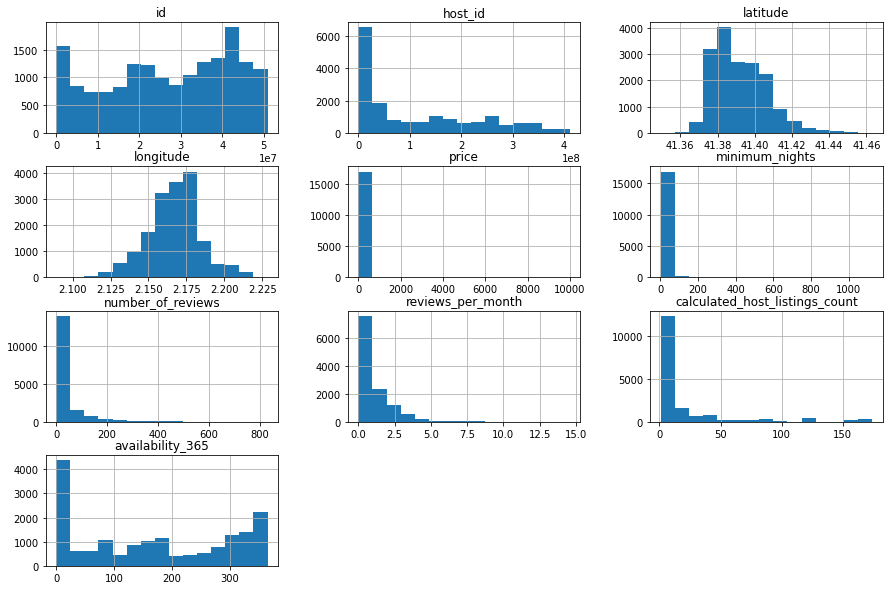

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

Pela avaliação de alguns histogramas temos possivelmente indícios de *outliers*. Tal situação fica mais evidente com a avaliação do resumo estatístico das variáveis numéricas abaixo.

In [9]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,17079.000000,17079.000000,17079.000000,11984.000000,17079.000000,17079.000000
mean,115.013994,12.217577,32.548100,1.012710,17.973476,167.022484
std,312.660261,29.996519,65.201064,1.200465,35.705521,133.622862
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,39.000000,1.000000,0.000000,0.150000,1.000000,20.000000
50%,69.000000,3.000000,4.000000,0.570000,3.000000,158.000000
75%,132.000000,30.000000,33.000000,1.500000,15.000000,307.000000
max,9999.000000,1124.000000,831.000000,14.570000,174.000000,365.000000


Avaliando o resumo estatístico acima, podemos confirmar o indício de *outliers*:
* A variável `price` possui 75% do valor abaixo de 132, porém seu valor máximo é de 9999.
* A quantidade mínima de noites (minimum_nights) está acima de 365 dias no ano.

Baseado em uma premissa que 75% da quantidade mínima de noites está abaixo de 30 dias, será utilizado esse valor como linha de corte para avaliação e exclusão dos *outliers*. 

minimum_nights: valores acima de 30:
3315 entradas
19.4098%


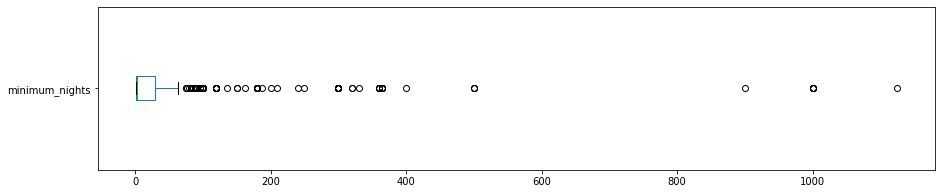

In [12]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

Baseado na média de preço da diária de aluguéis em Barcelona, a linha de corte para a variável `price` será de 350.

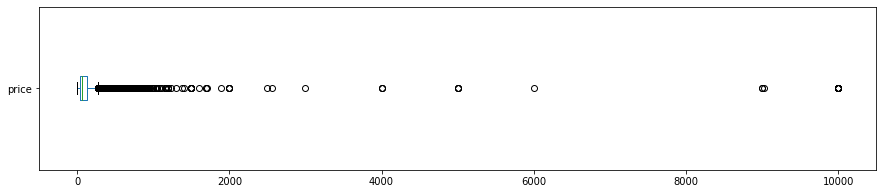


price: valores acima de 350:
542 entradas
3.1735%


In [16]:
# price
df.price.plot(kind='box', vert=False, figsize=(15,3),)
plt.show()

# ver quantidade de valores acima de 350 para price
print("\nprice: valores acima de 350:")
print("{} entradas".format(len(df[df.price > 350])))
print("{:.4f}%".format((len(df[df.price > 350]) / df.shape[0])*100))

Após a identificação e tratamento dos *outliers* nas variáveis `price`e `minimum_nights` é apresentado novamente os histogramas.

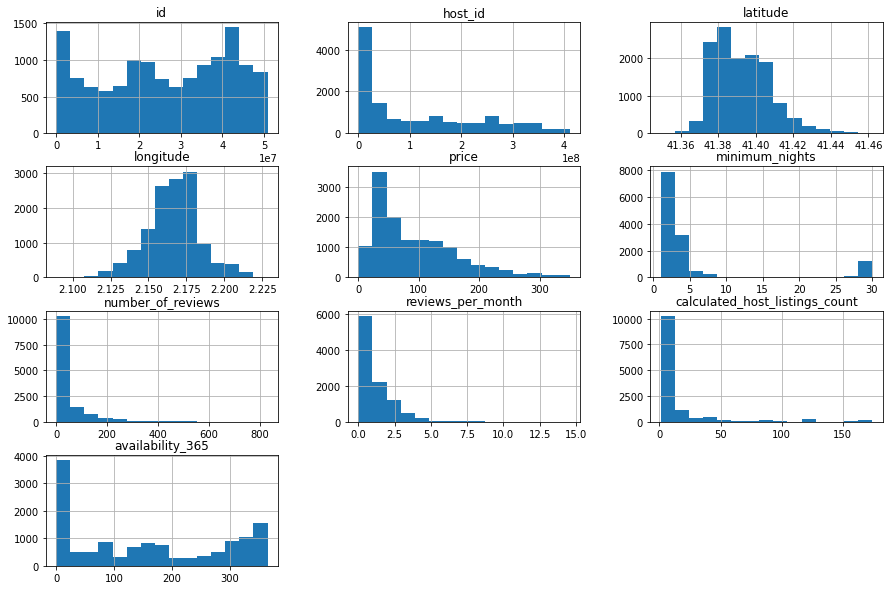

In [17]:
# remover os outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 350].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plotar histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

Uma avaliação visual dos histogramas demonstra uma certa padronização das distribuições dos valores.

### **Q4. Qual a média dos preços de aluguel?**

In [8]:
# ver a média da coluna `price``
df.price.mean()

115.01399379354763

### **Q4. Qual a correlação existente entre as variáveis**

In [18]:
# criar uma matriz de correlação
# mostrar a matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                 'calculated_host_listings_count', 'availability_365']].corr()

display(corr)




,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.154735,0.077212,0.075626,0.282212,0.224764
minimum_nights,-0.154735,1.000000,-0.143439,-0.147897,-0.002602,0.052383
number_of_reviews,0.077212,-0.143439,1.000000,0.711784,-0.093752,0.077654
reviews_per_month,0.075626,-0.147897,0.711784,1.000000,-0.058686,0.097139
calculated_host_listings_count,0.282212,-0.002602,-0.093752,-0.058686,1.000000,0.182754
availability_365,0.224764,0.052383,0.077654,0.097139,0.182754,1.000000


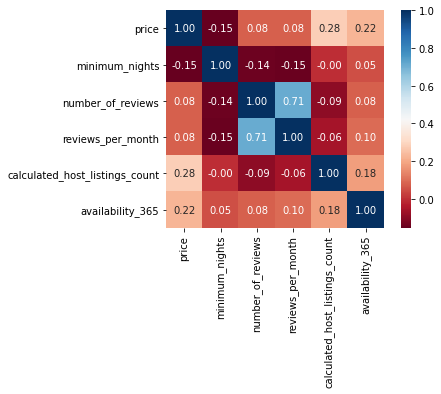

In [19]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

Verifica-se correlações mais neutras para negativas, do que correlações positivas. 

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [20]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Private room       6921
Entire home/apt    5919
Hotel room          232
Shared room         191
Name: room_type, dtype: int64

In [21]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Private room       0.521828
Entire home/apt    0.446279
Hotel room         0.017492
Shared room        0.014401
Name: room_type, dtype: float64

O tipo de imóvel mais alugado em Barcelona é o `Private room` com 52%.

### **Q6. Qual a localidade mais cara do dataset?**



In [22]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
la Vila Olímpica del Poblenou                   144.776860
Diagonal Mar i el Front Marítim del Poblenou    143.061404
la Dreta de l'Eixample                          131.808120
Vallvidrera, el Tibidabo i les Planes           126.714286
el Poblenou                                     113.582822
l'Antiga Esquerra de l'Eixample                 112.188654
la Sagrada Família                              107.982227
el Putxet i el Farró                            104.076471
Sant Gervasi - Galvany                          101.644444
Sant Antoni                                     101.139437
Name: price, dtype: float64

Na média a localidade mais cara de Barcelona é o la Vila Olimpica del Poblenou.

In [25]:
# ver quantidade de imóveis na la Vila Olímpica del Poblenou 
print(df_clean[df_clean.neighbourhood == "la Vila Olímpica del Poblenou"].shape)

# ver a quantidade de imóveis na Diagonal Mar i el Front Marítim del Poblenou
print(df_clean[df_clean.neighbourhood == "Diagonal Mar i el Front Marítim del Poblenou"].shape)

(121, 16)
(114, 16)


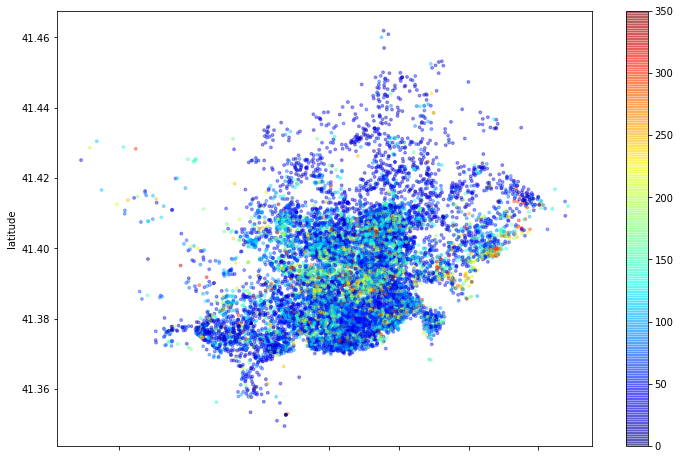

In [26]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [27]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

5.053984769659956

A média do mínimo de noites para aluguel em Barcelona são de 5 noites. 

## Conclusões


Foi realizado uma análise superficial dos dados do Airbnb para aluguel na cidade de Barcelona. Através da análise tem-se que a média dos preços de aluguéis em Barcelona fica em torno de 115, enquanto a média do mínimo de noites são de 12 dias (considerando todos os dados). Também é possível constatar que o tipo de imóvel mais alugado em Barcelona é o Private room com 52%.
Por outro lado, é importante ressaltar que na base de dados existem *outliers* em algumas das variáveis, ocasionando anomalias nos resultados e podendo causar interpretações erradas dos dados.